<a href="https://colab.research.google.com/github/dfmunoz11/Modelo_predictivo_SaberPro_2025/blob/main/01%20-%20exploraci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving kaggle.json to kaggle (2).json
udea-ai-4-eng-20252-pruebas-saber-pro-colombia.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  udea-ai-4-eng-20252-pruebas-saber-pro-colombia.zip
  inflating: data/submission_example.csv  
  inflating: data/test.csv           
  inflating: data/train.csv          
Dimensiones del conjunto de datos: (692500, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID                           692500 non-null  int64  
 1   PERIODO_ACADEMICO            692500 non-null  int64  
 2   E_PRGM_ACADEMICO             692500 non-null  object 
 3   E_PRGM_DEPARTAMENTO          692500 non-null  object 
 4   E_VALORMATRICULAUNIVERSIDAD  686213 non-null  object 
 5   E_HORASSEMANATRABAJA         661643 non-null  object 
 6   F_ESTRATOVIV

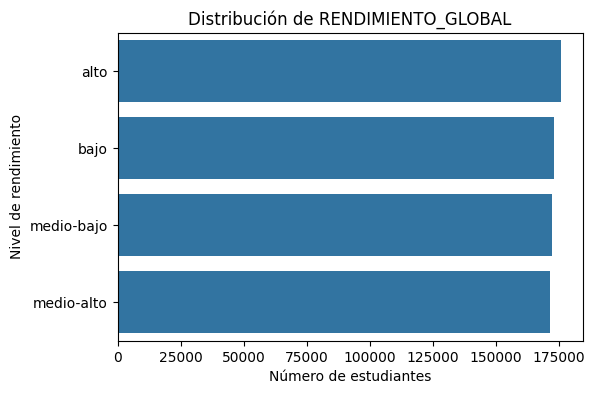

📊 Distribución de estudiantes por nivel de rendimiento:
RENDIMIENTO_GLOBAL
alto          175619
bajo          172987
medio-bajo    172275
medio-alto    171619
Name: count, dtype: int64


/tmp/ipython-input-2495716687.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


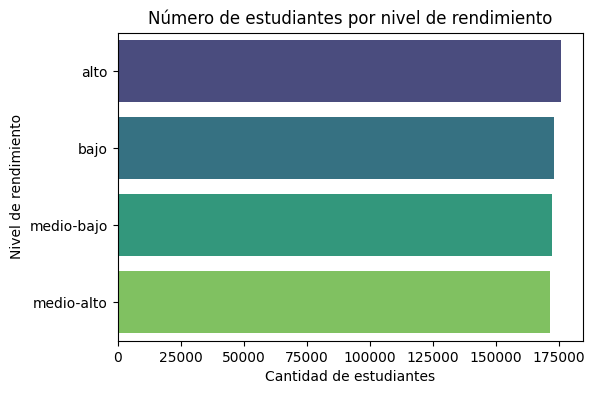

⚠️ No se encontró una columna de localidad en el dataset.


In [5]:
# =====================================================
# Exploración de datos - UDEA AI4ENG 20252
# Pruebas Saber Pro - IA para ingenierías
# =====================================================

# Configurar el entorno
!pip install -q kaggle pandas seaborn matplotlib

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar credenciales de Kaggle
# El archivo kaggle.json se carga desde el pc
from google.colab import files
files.upload() # <- Esta linea nos pide subir el archivo
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Descargar los datos
!kaggle competitions download -c udea-ai-4-eng-20252-pruebas-saber-pro-colombia

# Descomprimir el archivo zip
!unzip -o udea-ai-4-eng-20252-pruebas-saber-pro-colombia.zip -d data

# Carga del archivo train.csv
train_path = os.path.join("data", "train.csv")
df = pd.read_csv(train_path)

# Exploración inicial
print("Dimensiones del conjunto de datos:", df.shape)
df.head()

# Información general
df.info()

# Muestra de cuántas clases de rendimiento hay
print("\nDistribución de clases (RENDIMIENTO_GLOBAL):")
print(df['RENDIMIENTO_GLOBAL'].value_counts())

# Visualización del número de estudiantes por nivel de rendimiento
plt.figure(figsize=(6,4))
sns.countplot(y='RENDIMIENTO_GLOBAL', data=df, order=df['RENDIMIENTO_GLOBAL'].value_counts().index)
plt.title("Distribución de RENDIMIENTO_GLOBAL")
plt.xlabel("Número de estudiantes")
plt.ylabel("Nivel de rendimiento")
plt.show()

# Exploración por localidad (comprobar si la columna existe)
if 'ESTU_COD_RESIDE_DEPTO' in df.columns:
    plt.figure(figsize=(8,5))
    top_localidades = df['ESTU_COD_RESIDE_DEPTO'].value_counts().head(10)
    sns.barplot(x=top_localidades.values, y=top_localidades.index)
    plt.title("Top 10 Departamentos por número de estudiantes")
    plt.xlabel("Número de estudiantes")
    plt.ylabel("Departamento")
    plt.show()

# Estadísticas básicas
df.describe(include='all').transpose().head(10)
